# Install dependencies

In [226]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


# Data cleaning and handling missing values

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

# 2. Load the dataset from the 'data' folder
file_path = "../data/marketing_campaign1.xlsx"  # Adjust path if needed
df = pd.read_excel(file_path)

In [228]:
# 3. Quick EDA - Display the first few rows
print("Dataset Preview:")
display(df.head())


Dataset Preview:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0 5524.00     1957.00  Graduation         Single 58138.00     0.00      0.00  2012-09-04    58.00    635.00      88.00           546.00           172.00             88.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      1.00
1 2174.00     1954.00  Graduation         Single 46344.00     1.00      1.00  2014-03-08    38.00     11.00       1.00             6.00             2.00              1.00          6.00               2.00             1.00                 1.00               2.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00
2 4141.00     1965.00  Graduation       Together 71613.00     0.00      0.00  2013-08-21    26.00    426.00      49.00           127.00           111.00             21.00         42.00               1.00             8.00                 2.00              10.00               4.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00
3 6182.00     1984.00  Graduation       Together 26646.00     1.00      0.00  2014-02-10    26.00     11.00       4.00            20.00            10.00              3.00          5.00               2.00             2.00                 0.00               4.00               6.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00
4 5324.00     1981.00         PhD        Married 58293.00     1.00      0.00  2014-01-19    94.00    173.00      43.00           118.00            46.00             27.00         15.00               5.00             5.00                 3.00               6.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00

In [229]:
# 4. Check for missing values
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

# Display missing values information
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print("\nMissing Values in Each Column:")
display(missing_data[missing_data['Missing Values'] > 0])



Missing Values in Each Column:


Missing Values  Percentage
Income              24        1.07

In [230]:
# 5. Handle Missing Values
# Drop columns with more than 50% missing values
threshold = 50  # Set threshold for missing percentage
cols_to_drop = missing_data[missing_data['Percentage'] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nDropped columns with more than {threshold}% missing values: {list(cols_to_drop)}")

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values handled successfully!")


Dropped columns with more than 50% missing values: []

Missing values handled successfully!


In [231]:


# 6. Summary Statistics after handling missing values
print("\nDataset Summary:")
display(df.describe(include='all'))


Dataset Summary:


ID  Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome          Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
count   2240.00     2240.00        2240           2240   2240.00  2240.00   2240.00                 2240  2240.00   2240.00    2240.00          2240.00          2240.00           2240.00       2240.00            2240.00          2240.00              2240.00            2240.00            2240.00       2240.00       2240.00       2240.00       2240.00       2240.00   2240.00        2240.00    2240.00   2240.00
unique      NaN         NaN           5              8       NaN      NaN       NaN                  663      NaN       NaN        NaN              NaN              NaN               NaN           NaN                NaN              NaN                  NaN                NaN                NaN           NaN           NaN           NaN           NaN           NaN       NaN            NaN        NaN       NaN
top         NaN         NaN  Graduation        Married       NaN      NaN       NaN  2012-08-31 00:00:00      NaN       NaN        NaN              NaN              NaN               NaN           NaN                NaN              NaN                  NaN                NaN                NaN           NaN           NaN           NaN           NaN           NaN       NaN            NaN        NaN       NaN
freq        NaN         NaN        1127            864       NaN      NaN       NaN                   12      NaN       NaN        NaN              NaN              NaN               NaN           NaN                NaN              NaN                  NaN                NaN                NaN           NaN           NaN           NaN           NaN           NaN       NaN            NaN        NaN       NaN
first       NaN         NaN         NaN            NaN       NaN      NaN       NaN  2012-07-30 00:00:00      NaN       NaN        NaN              NaN              NaN               NaN           NaN                NaN              NaN                  NaN                NaN                NaN           NaN           NaN           NaN           NaN           NaN       NaN            NaN        NaN       NaN
last        NaN         NaN         NaN            NaN       NaN      NaN       NaN  2014-06-29 00:00:00      NaN       NaN        NaN              NaN              NaN               NaN           NaN                NaN              NaN                  NaN                NaN                NaN           NaN           NaN           NaN           NaN           NaN       NaN            NaN        NaN       NaN
mean    5592.16     1968.81         NaN            NaN  52237.98     0.44      0.51                  NaN    49.11    303.94      26.30           166.95            37.53             27.06         44.02               2.33             4.08                 2.66               5.79               5.32          0.07          0.07          0.07          0.06          0.01      0.01           3.00      11.00      0.15
std     3246.66       11.98         NaN            NaN  25037.96     0.54      0.54                  NaN    28.96    336.60      39.77           225.72            54.63             41.28         52.17               1.93             2.78                 2.92               3.25               2.43          0.26          0.26          0.26          0.25          0.11      0.10           0.00       0.00      0.36
min        0.00     1893.00         NaN            NaN   1730.00     0.00      0.00                  NaN     0.00      0.00       0.00             0.00             0.00              0.00          0.00               0.00             0.00                 0.00               0.00               0.00          

In [232]:

# Check missing values
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   float64       
 6   Teenhome             2240 non-null   float64       
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   float64       
 9   MntWines             2240 non-null   float64       
 10  MntFruits            2240 non-null   float64       
 11  MntMeatProducts      2240 non-null   float64       
 12  MntFishProducts      2240 non-null   float64       
 13  MntSweetProducts     2240 non-nul

# Outlier detection and removing using IQR (Interquartile Range)

Because the data is skewed, we will use the IQR method to detect and remove outliers instead of z-score

In [234]:
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

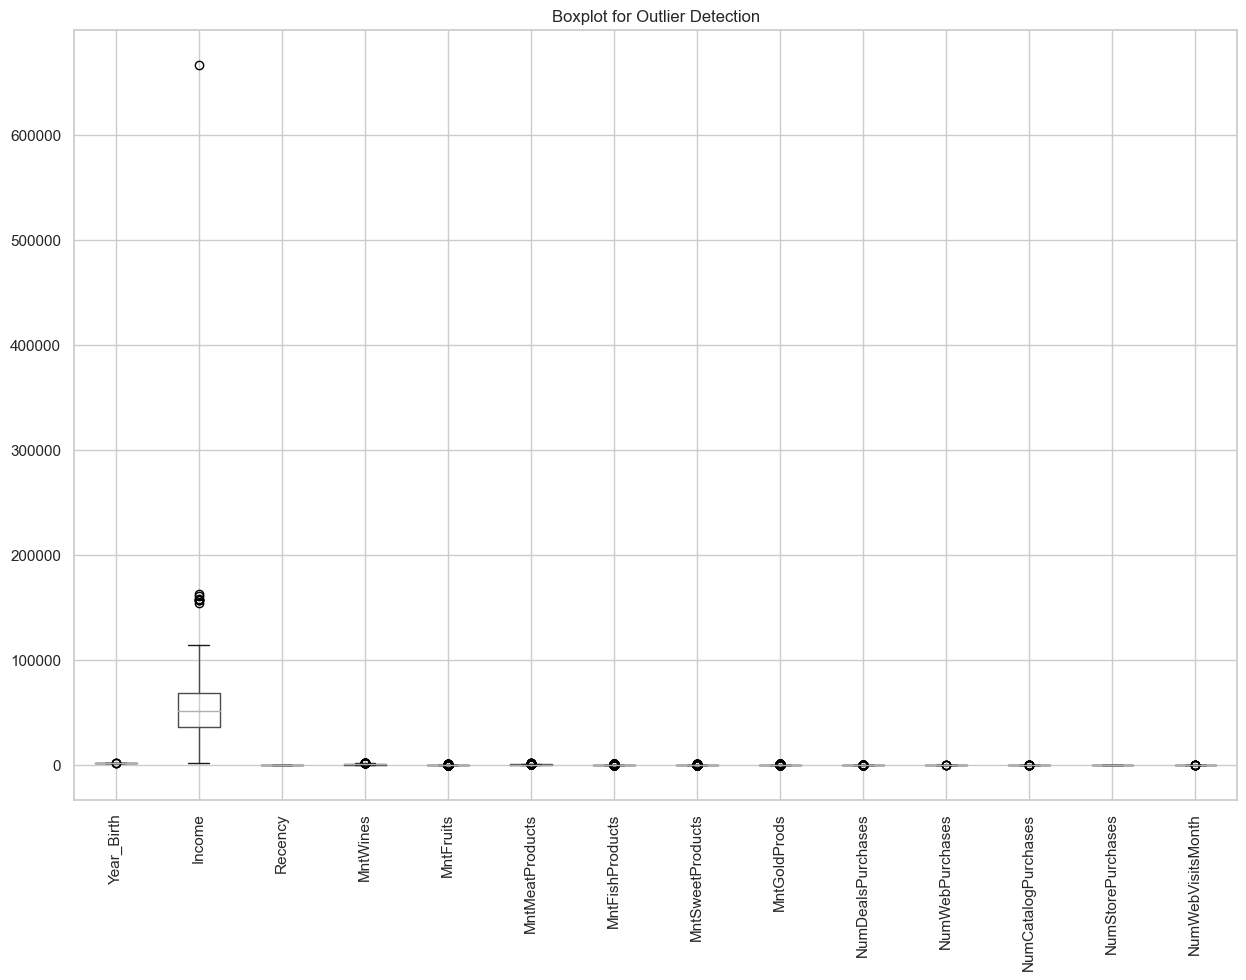

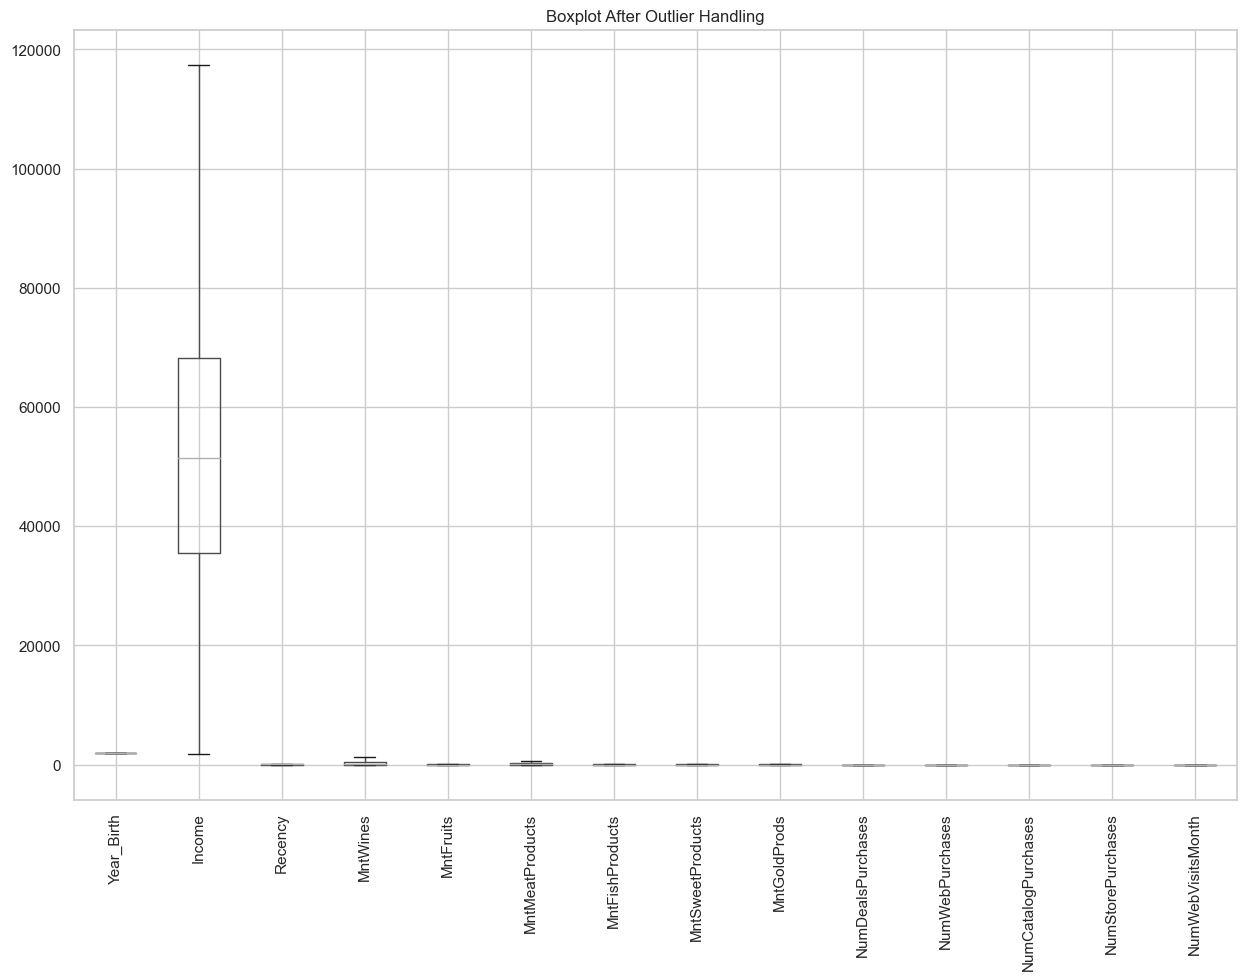

In [235]:
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe as a precaution
df_clean = df.copy()

# List of binary columns to drop before outlier detection and treatment
drop_cols = ['ID','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                            'AcceptedCmp1','AcceptedCmp2','Complain','Z_CostContact','Z_Revenue','Response']

# Detect outliers using the Z-score method
num_cols = df_clean.drop(columns=drop_cols,
                            axis=1).select_dtypes(include=['int64', 'float64']).columns                            # Temporary dropping all binary columns

# Boxplot before handling outliers
plt.figure(figsize=(15, 10))
df_clean[num_cols].boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

# Handling outliers using IQR method (Replacing with upper/lower bounds)
for col in num_cols:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

# Boxplot after handling outliers
plt.figure(figsize=(15, 10))
df_clean[num_cols].boxplot(rot=90)
plt.title("Boxplot After Outlier Handling")
plt.show()


In [236]:
# Replace the main df with df_clean and now main df contains data with treated outliers without hampering the binary columns:

df = df_clean

# Feature transformation

### Apply  one hot encoding 

In [237]:

# Encoding categorical variables
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)


### Check the final data set

In [238]:
# Assuming df_final is the final dataset after processing

# Check for categorical columns in the final dataset
categorical_columns_final = df.select_dtypes(include=['object'])

# Print the categorical columns (if any)
print("Categorical columns in the final dataset:")
print(categorical_columns_final)


Categorical columns in the final dataset:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]


### After encoding you can see catergorical convert into true or false which means 0 or 1 

## Feature engineering


# Creating new features

In [239]:

# Creating new features
df['Age'] = datetime.now().year - df['Year_Birth']  # Age calculation
df['Tenure'] = (datetime.now() - df['Dt_Customer']).dt.days  # Tenure in days(How long the customer has been in the company)
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])  # Total spending


## Data Type Conversion (Ensuring Correct Types)

In [240]:

# Ensure 'Dt_Customer' is in datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Convert numerical columns to appropriate types
numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 
                'Z_CostContact', 'Z_Revenue', 'Age', 'Tenure', 'Total_Spending']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to integer/float

# Verify final data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   float64       
 1   Year_Birth               2240 non-null   float64       
 2   Income                   2240 non-null   float64       
 3   Kidhome                  2240 non-null   float64       
 4   Teenhome                 2240 non-null   float64       
 5   Dt_Customer              2240 non-null   datetime64[ns]
 6   Recency                  2240 non-null   float64       
 7   MntWines                 2240 non-null   float64       
 8   MntFruits                2240 non-null   float64       
 9   MntMeatProducts          2240 non-null   float64       
 10  MntFishProducts          2240 non-null   float64       
 11  MntSweetProducts         2240 non-null   float64       
 12  MntGoldProds             2240 non-

### Univariate and Bivariate Analysis

##### Descriptive Statistics, Compute basic statistics such as mean, median, mode, standard deviation, min, and max for numerical columns

#### This will provide key statistics like mean, median, standard deviation, etc, Helps to detect skewness and outliers in the data.


In [241]:
# Basic Descriptive Statistics for numerical variables
desc_stats = df.describe().T  # Transpose for better readability
desc_stats['mode'] = df.mode().iloc[0]  # Add mode separately
desc_stats

count     mean      std     min      25%      50%      75%       max     mode
ID                      2240.00  5592.16  3246.66    0.00  2828.25  5458.50  8427.75  11191.00     0.00
Year_Birth              2240.00  1968.85    11.77 1932.00  1959.00  1970.00  1977.00   1996.00  1976.00
Income                  2240.00 51865.87 20936.10 1730.00 35538.75 51381.50 68289.75 117416.25 51381.50
Kidhome                 2240.00     0.44     0.54    0.00     0.00     0.00     1.00      2.00     0.00
Teenhome                2240.00     0.51     0.54    0.00     0.00     0.00     1.00      2.00     0.00
Recency                 2240.00    49.11    28.96    0.00    24.00    49.00    74.00     99.00    56.00
MntWines                2240.00   302.11   331.06    0.00    23.75   173.50   504.25   1225.00     2.00
MntFruits               2240.00    21.68    27.26    0.00     1.00     8.00    33.00     81.00     0.00
MntMeatProducts         2240.00   150.87   178.82    0.00    16.00    67.00   232.00    556.00   556.00
MntFishProducts         2240.00    32.12    40.36    0.00     3.00    12.00    50.00    120.50     0.00
MntSweetProducts        2240.00    21.94    27.54    0.00     1.00     8.00    33.00     81.00     0.00
MntGoldProds            2240.00    39.49    39.93    0.00     9.00    24.00    56.00    126.50   126.50
NumDealsPurchases       2240.00     2.22     1.54    0.00     1.00     2.00     3.00      6.00     1.00
NumWebPurchases         2240.00     4.06     2.65    0.00     2.00     4.00     6.00     12.00     2.00
NumCatalogPurchases     2240.00     2.62     2.73    0.00     0.00     2.00     4.00     10.00     0.00
NumStorePurchases       2240.00     5.79     3.25    0.00     3.00     5.00     8.00     13.00     3.00
NumWebVisitsMonth       2240.00     5.30     2.35    0.00     3.00     6.00     7.00     13.00     7.00
AcceptedCmp3            2240.00     0.07     0.26    0.00     0.00     0.00     0.00      1.00     0.00
AcceptedCmp4            2240.00     0.07     0.26    0.00     0.00     0.00     0.00      1.00     0.00
AcceptedCmp5            2240.00     0.07     0.26    0.00     0.00     0.00     0.00      1.00     0.00
AcceptedCmp1            2240.00     0.06     0.25    0.00     0.00     0.00     0.00      1.00     0.00
AcceptedCmp2            2240.00     0.01     0.11    0.00     0.00     0.00     0.00      1.00     0.00
Complain                2240.00     0.01     0.10    0.00     0.00     0.00     0.00      1.00     0.00
Z_CostContact           2240.00     3.00     0.00    3.00     3.00     3.00     3.00      3.00     3.00
Z_Revenue               2240.00    11.00     0.00   11.00    11.00    11.00    11.00     11.00    11.00
Response                2240.00     0.15     0.36    0.00     0.00     0.00     0.00      1.00     0.00
Education_Basic         2240.00     0.02     0.15    0.00     0.00     0.00     0.00      1.00     0.00
Education_Graduation    2240.00     0.50     0.50    0.00     0.00     1.00     1.00      1.00     1.00
Education_Master        2240.00     0.17     0.37    0.00     0.00     0.00     0.00      1.00     0.00
Education_PhD           2240.00     0.22     0.41    0.00     0.00     0.00     0.00      1.00     0.00
Marital_Status_Alone    2240.00     0.00     0.04    0.00     0.00     0.00     0.00      1.00     0.00
Marital_Status_Divorced 2240.00     0.10     0.30    0.00     0.00     0.00     0.00      1.00     0.00
Marital_Status_Married  2240.00     0.39     0.49    0.00     0.00     0.00     1.00      1.00     0.00
Marital_Status_Single   2240.00     0.21     0.41    0.00     0.00     0.00     0.00      1.00     0.00
Marital_Status_Together 2240.00     0.26     0.44    0.00     0.00     0.00     1.00      1.00     0.00
Marital_Status_Widow    2240.00     0.03     0.18    0.00     0.00     0.00     0.00      1.00     0.00
Marital_Status_YOLO     2240.00     0.00     0.03    0.00     0.00     0.00     0.00      1.00     0.00
Age                     2240.00    56.15    11.77   29.00    48.00    55.0

### Create Histograms, Box Plots, and Density Plots for key numerical variables

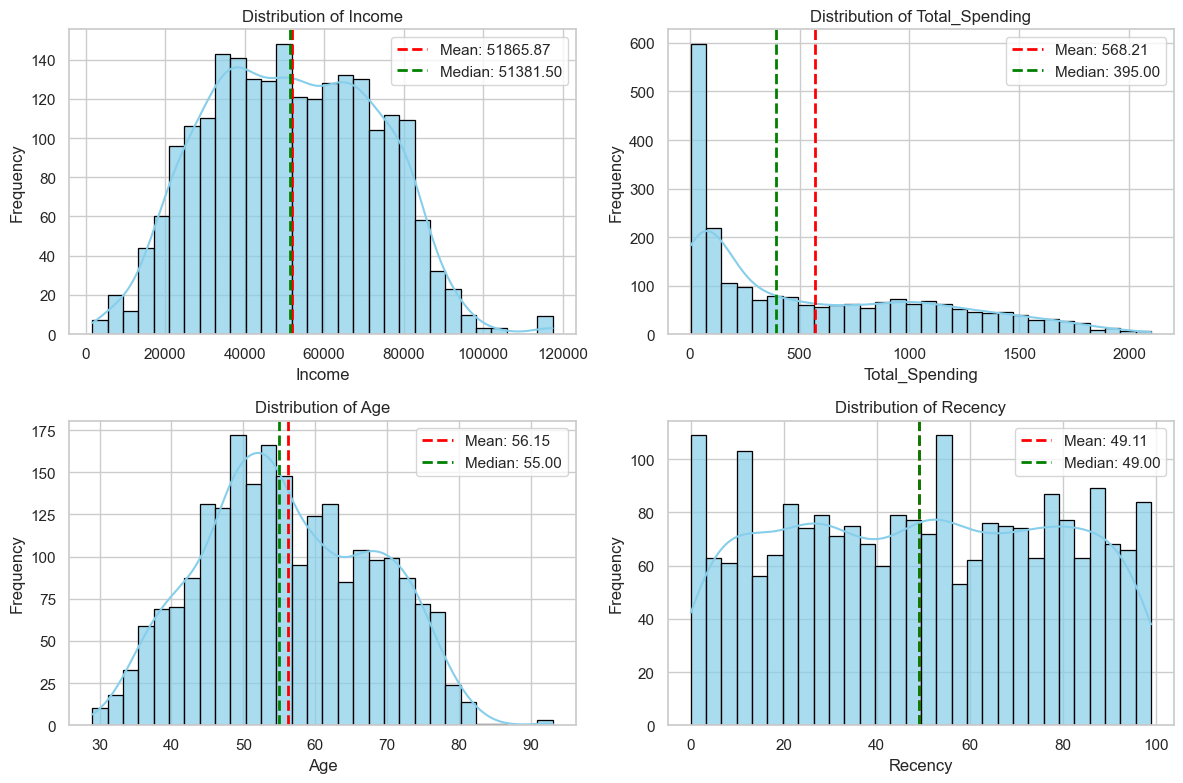

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define numerical columns
numerical_cols = ['Income', 'Total_Spending', 'Age', 'Recency']

# Set up the figure
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    
    # Plot histogram with KDE
    sns.histplot(df[col], bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
    
    # Add Mean & Median lines
    mean_value = df[col].mean()
    median_value = df[col].median()
    
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    
    # Log scale for better visualization if needed
    if df[col].skew() > 1:  
        plt.yscale('log')

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    
plt.tight_layout()
plt.show()

# Key Insight
##### Target High-Spenders: Since total spending is highly skewed, loyalty programs should focus on high-spending customers.
##### Engage Low-Spenders: Many customers have very low spending, indicating potential for marketing efforts to increase their engagement.
##### Middle-Aged Audience: Since most customers are 40-70 years old, marketing strategies should cater to middle-aged buyers.
##### Balanced Recency: Since recency is uniformly distributed, promotional campaigns should target all customer groups evenly, not just recent buyers.

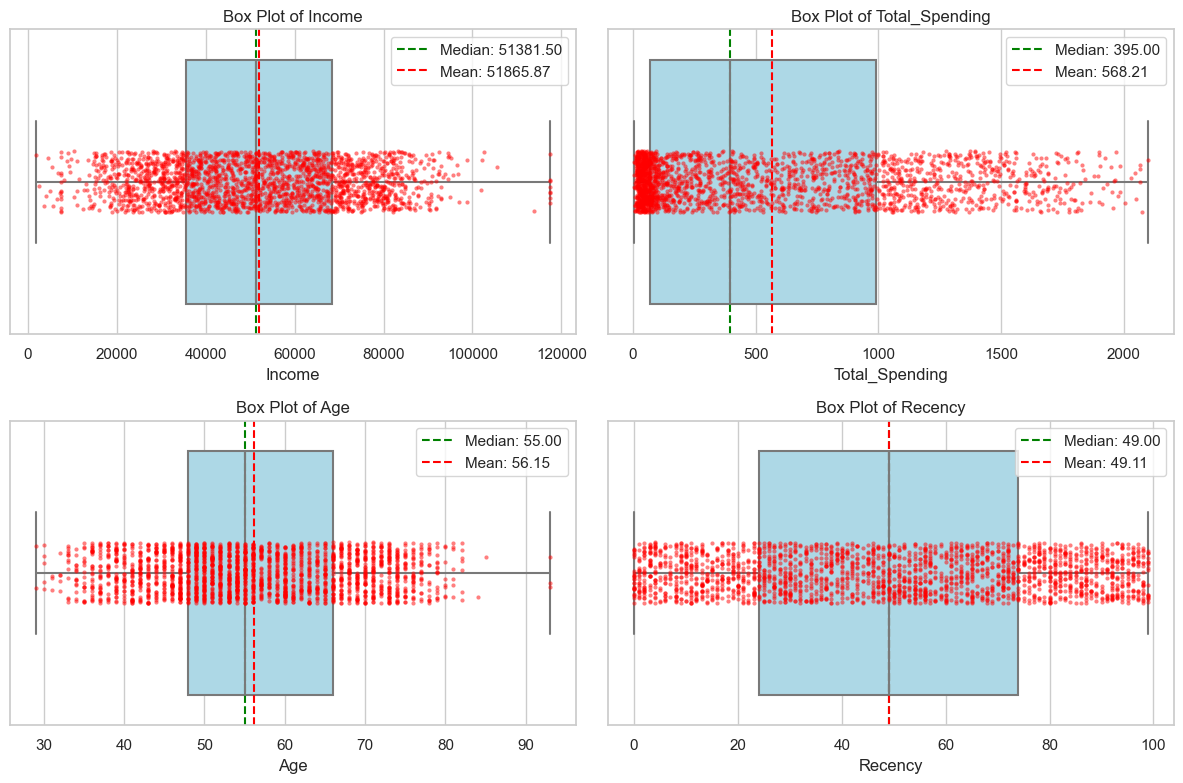

In [243]:
# Select numerical columns to visualize
num_cols = ['Income', 'Total_Spending', 'Age', 'Recency']

# Set style for better visualization
sns.set(style="whitegrid")

# Create box plots
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="lightblue", showfliers=True, boxprops=dict(facecolor="lightblue"))
    sns.stripplot(x=df[col], color="red", alpha=0.5, size=3, jitter=True)
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f"Median: {df[col].median():.2f}")
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
    plt.title(f"Box Plot of {col}")
    plt.legend()

plt.tight_layout()
plt.show()

### Key Insight 
#### Income and Age distributions appear normal, but Income has a few high-value outliers.
#### Total Spending is highly skewed, with a few customers spending much more than the majority.
#### Recency has some extreme values, indicating varying customer engagement levels.

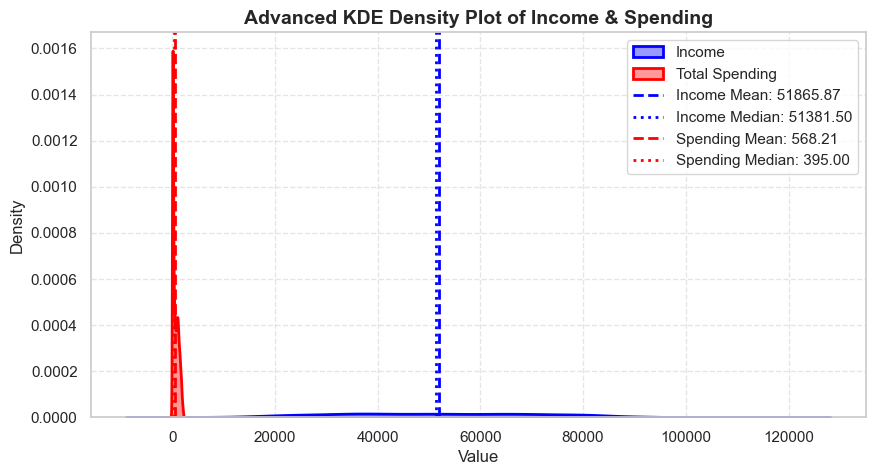

In [244]:
# Create Advanced KDE Plot
plt.figure(figsize=(10, 5))

# KDE for Income
sns.kdeplot(df["Income"], fill=True, color="blue", alpha=0.4, linewidth=2, label="Income", bw_adjust=0.8)

# KDE for Total Spending
sns.kdeplot(df["Total_Spending"], fill=True, color="red", alpha=0.4, linewidth=2, label="Total Spending", bw_adjust=0.8)

# Compute Mean & Median
income_mean, income_median = df["Income"].mean(), df["Income"].median()
spending_mean, spending_median = df["Total_Spending"].mean(), df["Total_Spending"].median()

# Add Mean & Median Lines
plt.axvline(income_mean, color='blue', linestyle='dashed', linewidth=2, label=f"Income Mean: {income_mean:.2f}")
plt.axvline(income_median, color='blue', linestyle='dotted', linewidth=2, label=f"Income Median: {income_median:.2f}")

plt.axvline(spending_mean, color='red', linestyle='dashed', linewidth=2, label=f"Spending Mean: {spending_mean:.2f}")
plt.axvline(spending_median, color='red', linestyle='dotted', linewidth=2, label=f"Spending Median: {spending_median:.2f}")

# Titles and Labels
plt.title("Advanced KDE Density Plot of Income & Spending", fontsize=14, fontweight="bold")
plt.xlabel("Value", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()

### Key Insight 
#### Income is normally distributed, while Total Spending is highly skewed.
#### Most customers have lower spending, but a few spend significantly more.
#### High-income customers do not always have high spending—this could indicate different spending habits.
#### Potential customer segmentation can be applied, identifying high-value customers separately.

### Categorical data,create count plots/bar plots, and pie charts.

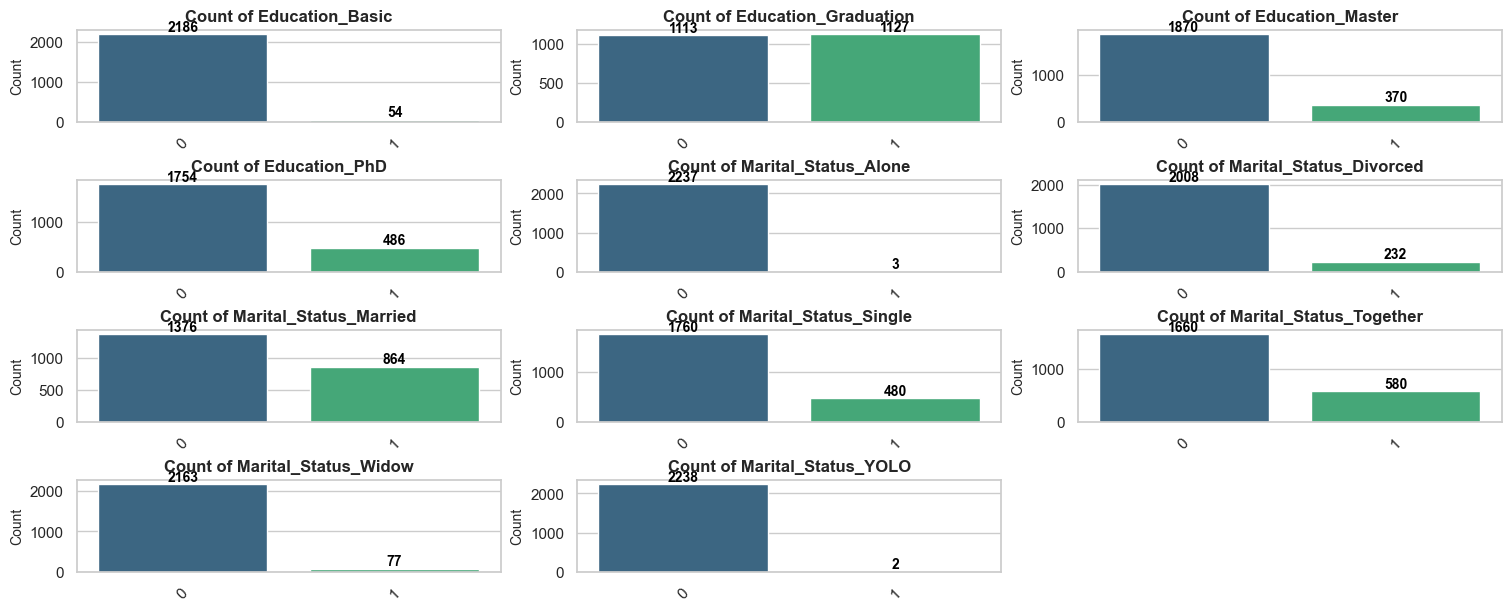

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Define categorical columns (Limit to 5 for visualization)
categorical_cols = [
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 
    'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married', 
    'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 
    'Marital_Status_YOLO'
]

# Define figure size dynamically based on categories
num_cols = len(categorical_cols[:11])
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Ensures proper grid structure

fig, axes = plt.subplots(rows, 3, figsize=(15, 6), constrained_layout=True)  # Optimized spacing
axes = axes.flatten()  # Flatten axes for easy iteration

# Advanced Count Plot with Annotations
for i, col in enumerate(categorical_cols[:11]):
    ax = axes[i]
    sns.countplot(data=df, x=col, palette='viridis', ax=ax)

    # Add count annotations on bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

    ax.set_title(f'Count of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel("")  # Remove x-label for cleaner look
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels

# Hide empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

### Key Insight
#### Marketing & Targeting: Products/services related to education can focus on graduates, as they represent a large segment.
#### Customer Segmentation: Relationship status can be useful for personalizing offers (e.g., family-oriented marketing for married individuals).

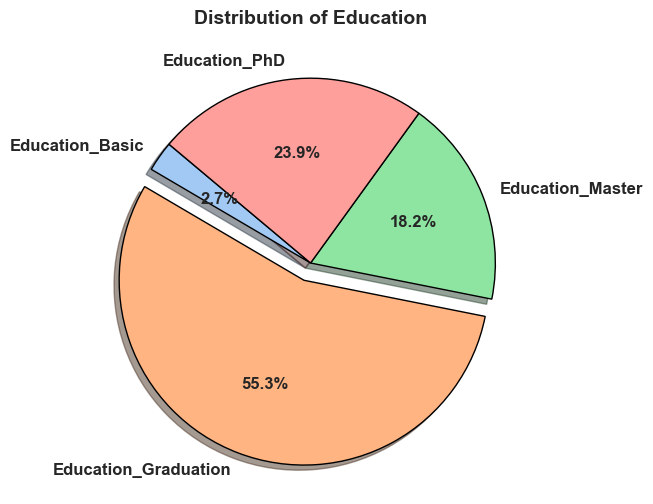

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant one-hot encoded categorical columns
categorical_cols = [
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'
]

# Summing across rows to get total count per category
category_counts = df[categorical_cols].sum()

# Define colors using Seaborn
colors = sns.color_palette('pastel')[0:len(category_counts)]

# Explode the largest segment for better visibility
explode = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Create the Pie Chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border for clarity
)

# Customize text properties
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.title('Distribution of Education', fontsize=14, fontweight='bold')
plt.show()

### Key Insight 
#### Targeting Higher Education Holders: Since a large percentage of customers have a Master’s or Ph.D., businesses can offer specialized services, high-end products, or advanced learning opportunities.
#### Limited Basic Education: Since very few customers have only basic education, simplified or entry-level services may not be the best focus for this demographic.

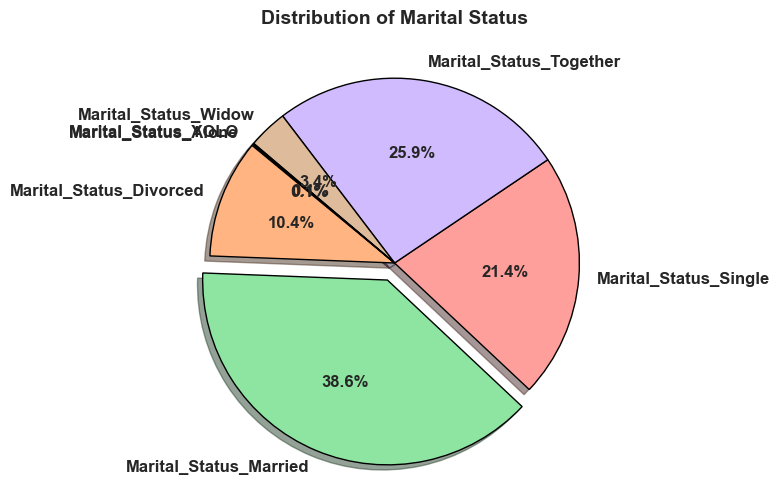

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the relevant one-hot encoded categorical columns
categorical_cols = ['Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Married',
    'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow', 'Marital_Status_YOLO'
]

# Summing across rows to get total count per category
category_counts = df[categorical_cols].sum()

# Define colors using Seaborn
colors = sns.color_palette('pastel')[0:len(category_counts)]

# Explode the largest segment for better visibility
explode = [0.1 if i == category_counts.idxmax() else 0 for i in category_counts.index]

# Create the Pie Chart
plt.figure(figsize=(10, 6))
wedges, texts, autotexts = plt.pie(
    category_counts, 
    labels=category_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # Add border for clarity
)

# Customize text properties
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.title('Distribution of Marital Status', fontsize=14, fontweight='bold')
plt.show()

### Key Insight 
#### Family and Relationship-Oriented Marketing: Since the majority are married or in a relationship, promotions for family products, couple-oriented experiences, and home-related services could be highly effective.
#### Targeting Singles with Lifestyle Brands: Since a significant portion is single, businesses can focus on individualistic and experience-driven marketing strategies.


### Bivariate Analysis
#### Numerical vs Numerical 

#### Scatter Plot

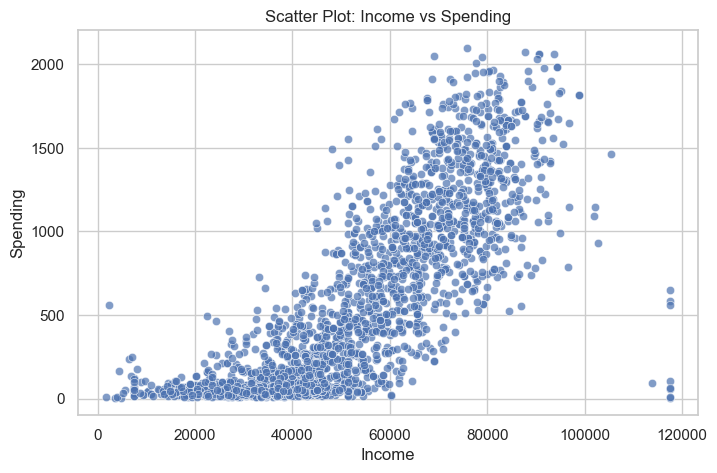

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns  # Categorical Variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numerical Variables


 # Scatter Plot (Example: Income vs. Spending)
# --------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Income"], y=df["Total_Spending"], alpha=0.7)
plt.xlabel("Income")
plt.ylabel("Spending")
plt.title("Scatter Plot: Income vs Spending")
plt.show()



### Key Insight
#### Higher-income customers tend to spend more, but spending does not increase proportionally.
#### Some customers with moderate income levels exhibit high spending, possibly indicating a targeted segment.

### Pair plot


In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numerical columns for pair plot
selected_numerical_cols = ["Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts"]

# Generate pair plot for selected numerical variables
sns.pairplot(df[selected_numerical_cols])
plt.show()


### Key Insight
#### Wines have the highest spending among all product categories, showing a strong correlation with income.
#### Meat product purchases are moderately correlated with income, while fruit, fish, and sweet product spending are relatively low across income levels.

### Categorical vs Numerical 


### Box plot

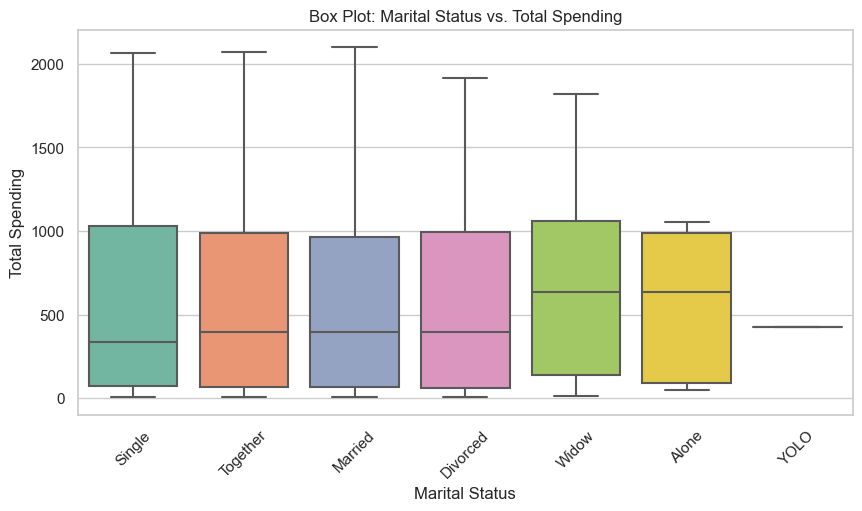

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct categorical columns from one-hot encoding
df["Marital_Status"] = df[
    ["Marital_Status_Alone", "Marital_Status_Divorced", "Marital_Status_Married",
     "Marital_Status_Single", "Marital_Status_Together", "Marital_Status_Widow",
     "Marital_Status_YOLO"]
].idxmax(axis=1).str.replace("Marital_Status_", "")


# Box Plot: Marital Status vs. Total Spending
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Marital_Status"], y=df["Total_Spending"], palette="Set2")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.title("Box Plot: Marital Status vs. Total Spending")
plt.xticks(rotation=45)
plt.show()




### Key Insight 
#### Customers who are Married and Together seem to have higher spending variability.
#### Singles and Widows have relatively lower total spending on average.
#### There are a few outliers with very high spending, particularly in the "Married" category.

### Bar plot

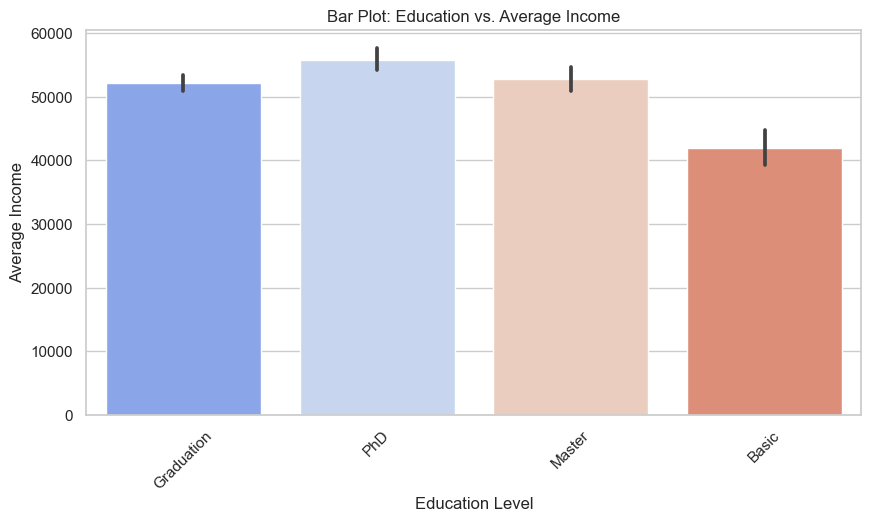

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reconstruct 'Education' column from one-hot encoding
df["Education"] = df[
    ["Education_Basic", "Education_Graduation", "Education_Master", "Education_PhD"]
].idxmax(axis=1).str.replace("Education_", "")

# Bar Plot: Education vs. Average Income
plt.figure(figsize=(10, 5))
sns.barplot(x=df["Education"], y=df["Income"], palette="coolwarm", estimator=lambda x: sum(x)/len(x))
plt.xlabel("Education Level")
plt.ylabel("Average Income")
plt.title("Bar Plot: Education vs. Average Income")
plt.xticks(rotation=45)
plt.show()


### Key Insight 
#### High-income, high-spending customers (PhD holders, married individuals) may respond better to premium product promotions.
#### Customers with lower spending could be targeted with discounts or budget-friendly products.

### Correlation and Heatmaps

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


### Key Insight 
#### Strong Positive Correlation:
#### MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds are highly correlated with Total Spending.
🔹 Insight: Customers who spend more on one category (e.g., wine) tend to spend more on others too. These customers can be targeted for premium offers or cross-selling strategies.
#### NumWebPurchases and NumCatalogPurchases have a strong correlation.
🔹 Insight: Customers who buy through catalogs also tend to purchase online. This segment could benefit from exclusive online promotions or targeted marketing.
#### Strong Negative Correlation:
#### Recency (Days since last purchase) and Total Spending show a negative correlation.
🔹 Insight: Customers who purchased recently tend to have higher spending, indicating that frequent buyers are more valuable. Implementing loyalty programs for these customers could increase retention.
#### Moderate Correlations:
#### Income and Total Spending show a moderate positive correlation.
🔹 Insight: While higher-income customers spend more, the correlation isn't very strong. This suggests income alone isn't the best predictor of spending—other factors like family size or lifestyle might play a role.
#### Teenhome & Kidhome have a weak or no correlation with spending.
🔹 Insight: Households with kids or teenagers do not significantly impact spending patterns, meaning family size may not be a primary segmentation factor.

In [253]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# Identify Highly Correlated Variables
# -------------------------

# Define a threshold for high correlation
threshold = 0.75

# Find pairs of variables with high correlation
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Check absolute correlation
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])

# Sort by highest correlation
high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False)

# Display the highly correlated feature pairs
print("Highly Correlated Features (Threshold > 0.75):")
print(high_corr_df)


Highly Correlated Features (Threshold > 0.75):
             Feature 1            Feature 2  Correlation
3       Total_Spending             MntWines         0.93
4       Total_Spending      MntMeatProducts         0.86
5       Total_Spending  NumCatalogPurchases         0.80
2       Total_Spending               Income         0.80
0  NumCatalogPurchases      MntMeatProducts         0.75
1                  Age           Year_Birth        -1.00


### Key Insight
#### Big Spenders Buy Wines & Meat – Customers spending more on wines (0.93) and meat (0.86) are high spenders overall. Target them with premium offers.

#### Higher Income = Higher Spending (0.80) – Wealthier customers spend more. Upsell luxury products.

#### Catalog Buyers Spend More (0.80) – Frequent catalog shoppers are high-value customers. Boost catalog promotions.

#### Meat Buyers Prefer Catalogs (0.75) – Those buying meat products often shop via catalogs. Bundle offers in catalogs.

#### Age vs. Year of Birth (-1.00) – Age is correctly derived from birth year. No action needed.

# Advanced Analysis and Segmentation Insights:
---

## 1. Advanced Visualizations:
  - Pair Plots, Violin Plots, and Facet Grids to explore multiple features and relationships across different subsets of data.

## Pair Plot visual:

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot using seaborn to show multiple feature relation based on Response
sns.pairplot(df, vars=['Income','Age','Tenure','Total_Spending', 'Recency','MntWines','MntMeatProducts',
                       'MntFishProducts'], hue='Response',diag_kind='kde')
plt.show()

## Key Insights:
  - Income vs Total Spending:
    - There is a clear positive correlation between Income and Total_Spending.
    - Higher income customers tend to have higher spending, which makes sense.

  - Tenure (in days) vs Response:
    - Tenure has a very narrow range, meaning most customers have a similar tenure.

  - Total Spending and Products [MntWines / MntMeatProducts / MntFishProducts]:
    - Shows a clear linear relationship.

## Violin Plot Visual:

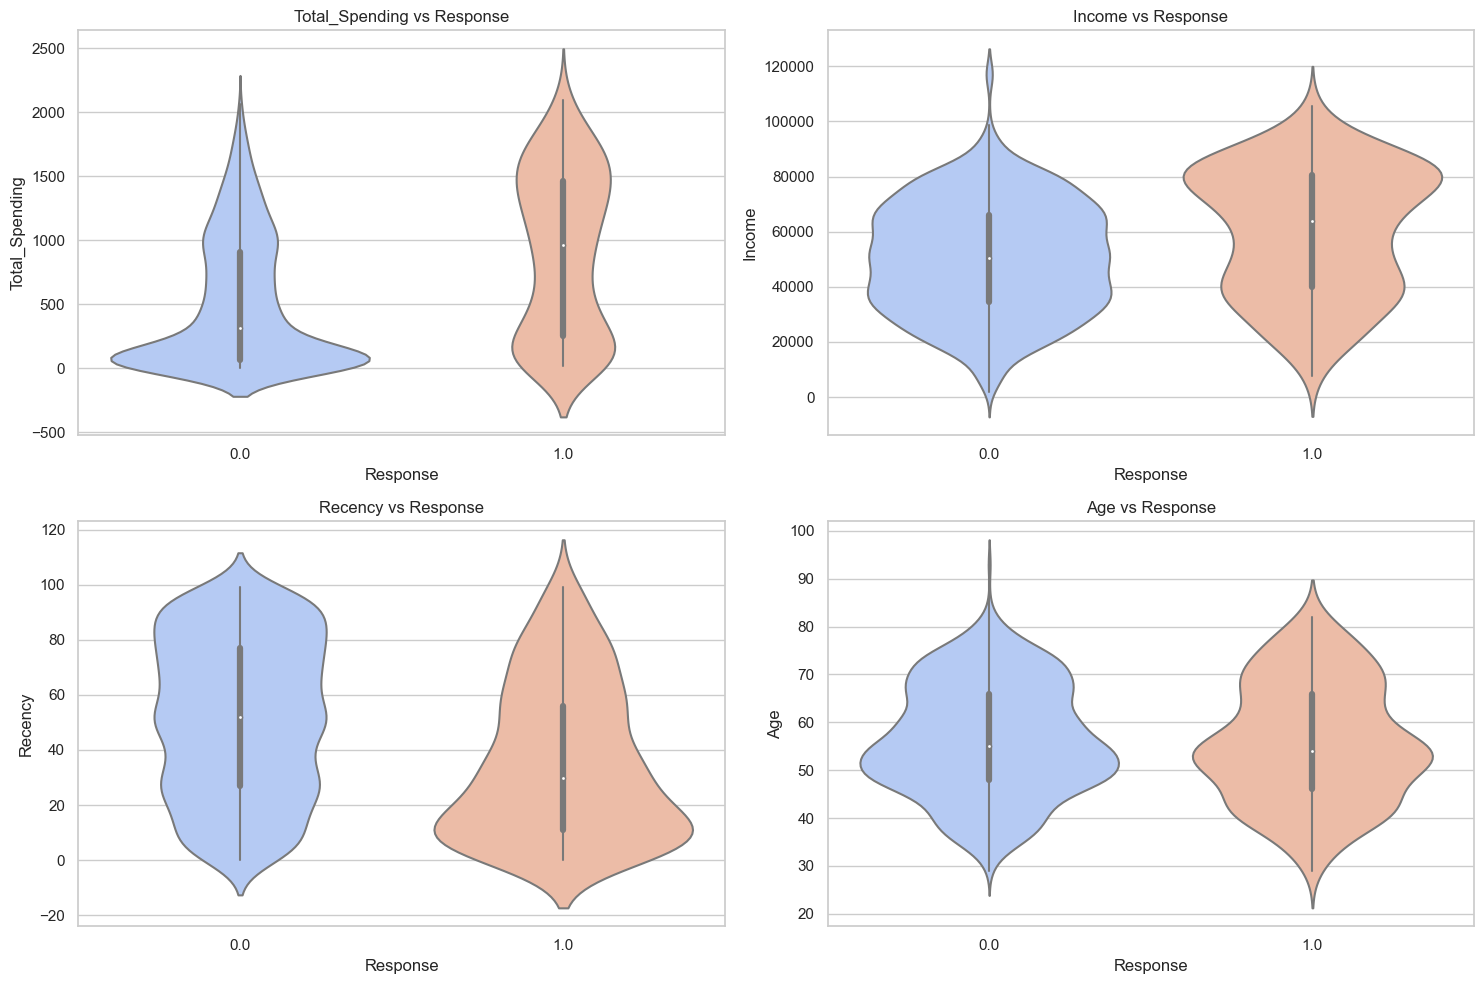

In [255]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting violin visual 

fig, axes = plt.subplots(2,2, figsize=(15,10))              # Set figure size
features = ['Total_Spending','Income','Recency','Age']      # Define features
titles = ['Total_Spending vs Response','Income vs Response','Recency vs Response','Age vs Response']

# Loop through features to create violin plots
for ax, feature, title in zip(axes.flatten(), features, titles):
    sns.violinplot(x = 'Response', y = feature, data = df, palette = 'coolwarm', ax=ax)
    ax.set_title(title)

plt.tight_layout()          # Adjust layout for better visibility
plt.show()


## Key Insights:
 - Total Spending vs Income:
   - Customers who responded response = 1, show higher spending compared to non-responders.
   - This indicates high spenders are more engaged with campaigns.

 - Income vs Response:
   - Income distributions seem quite similar between responders and non-responders.
   - Income may not be a strongest predictor but still can contribute.

 - Recency vs Response:
   - Responders tend to have a lower recency value which indicates they made a recent purchase.
   - Non-responders have a varying recency distribution, indicating they must be contacted at different intervals.

 - Age vs Response:
   - Age distribution looks quite similar between responders and non-responders.
   - This feature doesn't really impact campaign responses.

## Facetgrid Visual:

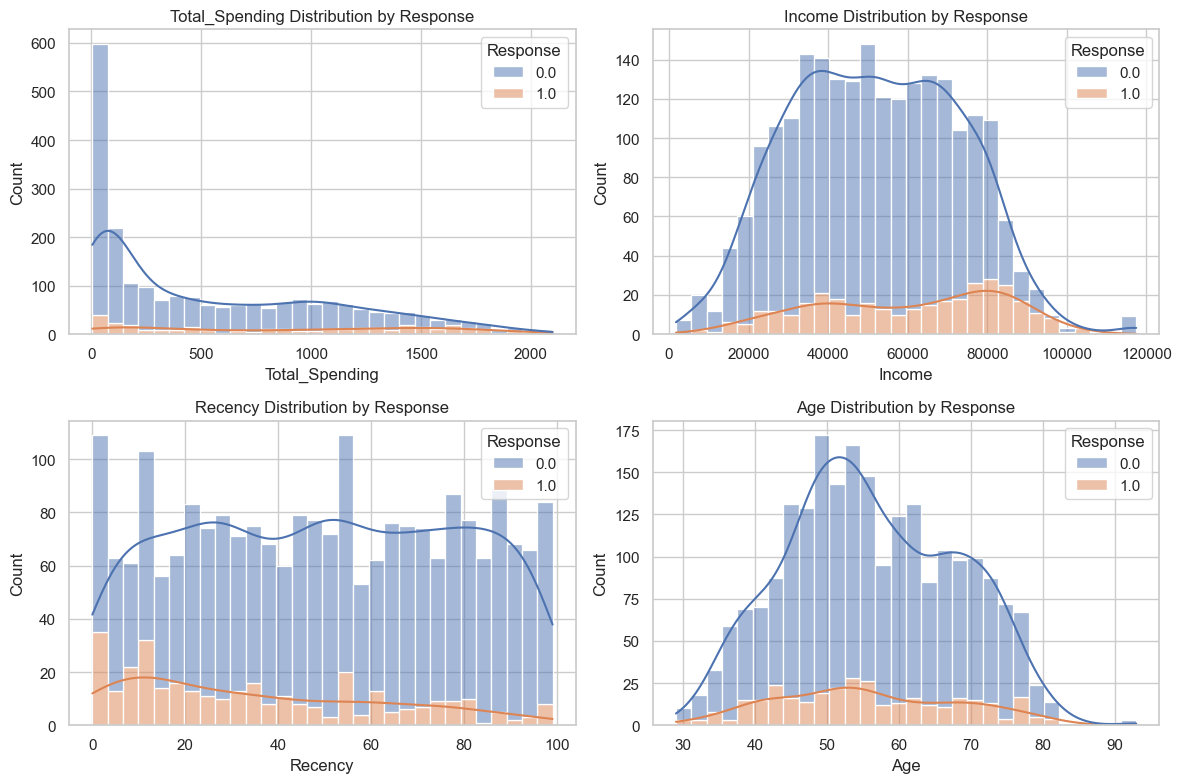

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Total_Spending','Income','Recency','Age']                  # List of features
fig, axes = plt.subplots(2,2, figsize=(12,8))                           # Create a facetgrid for multiple features
axes = axes.flatten()                                                   # Flatten the axes for easy interpretation

for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue='Response', kde=True, multiple='stack', bins=30, ax=axes[i])      # Plot each feature
    axes[i].set_title(f"{feature} Distribution by Response")

plt.tight_layout()                                                       # Adjust layout
plt.show()                                                               # Display plot


## Key Insights:
  - Total Spending vs Response:
    - Most customers spend very little - high concentration near 0.
    - Responders (Orange) do have higher spending on an average that non-responders (Blue).
    - Majority of customers spend less.

  - Income vs Response:
    - Majority of customers have an income between 20K - 80K.
    - Higher-income customers tend to spend more and likely to respond.
    
  - Recency vs Response:
    - Recency (days since last purchase) measures how recent a customer interacted (lower=recent).
    - Responders (1) tend to have lower recency which indicates they engaged more recently than non-responders.

  - Age vs Response:
    - Majority of customers belong to age between 40 - 60.
    - Customers belonging to age group 50 - 60 tend to have a higher response.
---

## 2. Segmenting Customers:
  - Identifying potential customer segments based on spending patterns, responses to campaigns, and purchase frequency.
  - Visualizing these segments using scatter plots or bar plots.

### To segment customers into different groups to analyse certain patterns and behaviors, will use KMeans clustering method:

In [257]:
# Update the df_clean with new features:
df_clean[['Age','Tenure','Total_Spending']] = df[['Age','Tenure','Total_Spending']].copy()

# Display the change:
df_clean.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response   Age  Tenure  Total_Spending
0 5524.00     1957.00  Graduation         Single 58138.00     0.00      0.00  2012-09-04    58.00    635.00      81.00           546.00           120.50             81.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      1.00 68.00    4585         1551.50
1 2174.00     1954.00  Graduation         Single 46344.00     1.00      1.00  2014-03-08    38.00     11.00       1.00             6.00             2.00              1.00          6.00               2.00             1.00                 1.00               2.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00 71.00    4035           27.00
2 4141.00     1965.00  Graduation       Together 71613.00     0.00      0.00  2013-08-21    26.00    426.00      49.00           127.00           111.00             21.00         42.00               1.00             8.00                 2.00              10.00               4.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00 60.00    4234          776.00
3 6182.00     1984.00  Graduation       Together 26646.00     1.00      0.00  2014-02-10    26.00     11.00       4.00            20.00            10.00              3.00          5.00               2.00             2.00                 0.00               4.00               6.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00 41.00    4061           53.00
4 5324.00     1981.00         PhD        Married 58293.00     1.00      0.00  2014-01-19    94.00    173.00      43.00           118.00            46.00             27.00         15.00               5.00             5.00                 3.00               6.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00 44.00    4083          422.00

Dataset successfully scaled. Shape : (2240, 16)
WCSS successfully computed


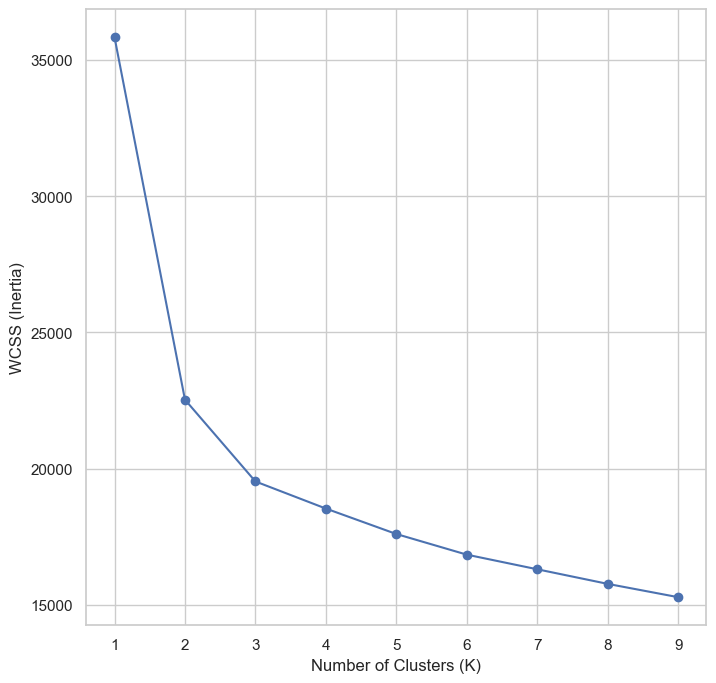

In [258]:
# Import packages:
from sklearn.cluster import KMeans                       # To form clusters
from sklearn.preprocessing import StandardScaler         # To scale the data for KMeans

# Will use df_clean again to scale only the numeric datatype except binary columns:
drop_cols = ['ID','Year_Birth','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
              'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df_num = df_clean.drop(columns=drop_cols, axis=1).select_dtypes(include=['int64','float64'])

# Scale the data:
scaler = StandardScaler()                     # Initialize the scaler
df_scaled = scaler.fit_transform(df_num)      # Scale the data
print(f"Dataset successfully scaled. Shape : {df_scaled.shape}")

# Since dataset has been scaled, to form clusters using KMeans : Let's find the best K value using elbow method
wcss = []                                      # Created empty list to append in the results

for i in range(1,10):                            # Loops through range 1:10
    k_c = KMeans(n_clusters=i, random_state=42)  # Initialized KMeans
    k_c.fit(df_scaled)                           # Fit and predict the best K value
    wcss.append(k_c.inertia_)                    # Append to wcss

print("WCSS successfully computed")

# Plot the visual for wcss

plt.figure(figsize=(8,8))                                                # Set plot figure
plt.plot(range(1,10), wcss, marker='o', linestyle='-', color='b')        # Plot wcss
plt.xlabel("Number of Clusters (K)")                                     # X-axis label
plt.ylabel("WCSS (Inertia)")                                             
plt.grid(True)                                                           # Grid lines for better readability
plt.show()                                                               # Display the plot

### **Based on the elbow point, best K = 2 and 3 so to have a good enough number of segments will fit_predict KMeans using cluster 3**

In [259]:
# Use KMeans
kmeans = KMeans(n_clusters=3, random_state=42)          # Initialize with best K value
df['Cluster'] = kmeans.fit_predict(df_scaled)           # Added a new column of cluster to original dataframe by predicting on the scaled data
print(f"Clusters formed. Displaying DataFrame:\n {df.head(10)}")

Clusters formed. Displaying DataFrame:
        ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_Spending Marital_Status   Education  Cluster
0 5524.00     1957.00 58138.00     0.00      0.00  2012-09-04    58.00    635.00      81.00           546.00           120.50             81.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0

## Identifying potential customer segment based on spending patterns now:

In [260]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', 1000)        # Increase output width
pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats for readability

In [261]:
import pandas as pd
from IPython.display import display

# Ensure full output visibility
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)     
pd.set_option('display.width', 1000)        

# Grouping by cluster and analyzing total spending
Total_Spend_Cluster = df.groupby('Cluster')['Total_Spending'].agg(['mean', 'median', 'min', 'max', 'count']).round(2)
print("\n Cluster Segment Pattern for Total Spending:")
display(Total_Spend_Cluster)

# Analyzing product-based spending per cluster
Product_Based_Cluster = df.groupby('Cluster')[['MntWines', 'MntMeatProducts', 'MntFishProducts']].mean().round(2)
print("\n Cluster Segment Pattern for Product Spending:")
display(Product_Based_Cluster)

# Demographic patterns (Age and Income)
Demographic_Cluster = df.groupby('Cluster')[['Age', 'Income']].agg(['median', 'min', 'max']).round(2)
print("\n Cluster Segment Pattern Demographically:")
display(Demographic_Cluster)

# Education distribution per cluster
Categorical_Edu_Cluster = df.groupby('Cluster')['Education'].value_counts(normalize=True).unstack().round(2)
print("\n Cluster Segment Pattern for Education:")
display(Categorical_Edu_Cluster)

# Marital status distribution per cluster (Fixed column name)
Categorical_Mar_Cluster = df.groupby('Cluster')['Marital_Status'].value_counts(normalize=True).unstack().round(2)
print("\n Cluster Segment Pattern for Marital Status:")
display(Categorical_Mar_Cluster)



 Cluster Segment Pattern for Total Spending:


mean  median    min     max  count
Cluster                                      
0       1217.20 1184.50 299.00 2099.50    683
1        638.77  549.00  62.00 1738.50    549
2         90.03   62.00   5.00  628.00   1008


 Cluster Segment Pattern for Product Spending:


MntWines  MntMeatProducts  MntFishProducts
Cluster                                            
0          596.81           372.58            77.59
1          420.58           111.56            22.61
2           37.91            22.06             6.49


 Cluster Segment Pattern Demographically:


Age               Income                   
        median   min   max   median      min       max
Cluster                                               
0        56.00 30.00 93.00 74918.00 38410.00 117416.25
1        60.00 33.00 82.00 55517.00 22507.00 117416.25
2        52.00 29.00 93.00 34416.50  1730.00 117416.25


 Cluster Segment Pattern for Education:


Education  Basic  Graduation  Master  PhD
Cluster                                  
0           0.09        0.56    0.14 0.20
1           0.06        0.46    0.19 0.28
2           0.16        0.49    0.17 0.19


 Cluster Segment Pattern for Marital Status:


Marital_Status  Alone  Divorced  Married  Single  Together  Widow  YOLO
Cluster                                                                
0                0.00      0.10     0.38    0.22      0.26   0.04   NaN
1                0.00      0.11     0.38    0.19      0.26   0.04  0.00
2                0.00      0.10     0.39    0.22      0.25   0.03   NaN

## Key Insights:
  - Total Spending Cluster : 
    - Cluser 0 -> High Spenders with an average of $1217 and max $2099 : likely premium customers.
    - Cluster 1 -> Moderate Spenders (Average : $638).
    - Cluster 2 -> Low Spenders with a mean of $90. Might be infrequent buyers or budgetting customers.

  - Product Based Cluster :
    - Cluster 0 -> Spends the most across all main products, especially on Wines ($596).
    - Cluster 1 -> Spends significantly less than Cluster 0.
    - Cluster 2 -> Barely spends, particularly on luxurious products.

  - Demographic Patterns :
    - Cluster 0 -> Older customers (median : 56) have high income ($74,918) indicating these are some well-established customers.
    - Cluster 1 -> slightly older aged at 60, however; have a low income ($55,517) than Cluster 0.
    - Cluster 2 -> Youngest group cluster : lowest median income ($34,416).

  - Education Cluster :
    - Most customers have a graduation degree (50%) across clusters.
    - Cluster 1 has more PhD holders, possibly influencing spending patterns.
    - Cluster 2 has more Basic education.

  - Marital Status Segment :
    - Majority of customers are married (with over 38-39 percent) across clusters.
    - Very few widows and divorced.
    - YOLO category has NaN values, could be missing occurences. 

## Visualizing these segments using scatter plots and bar plots:

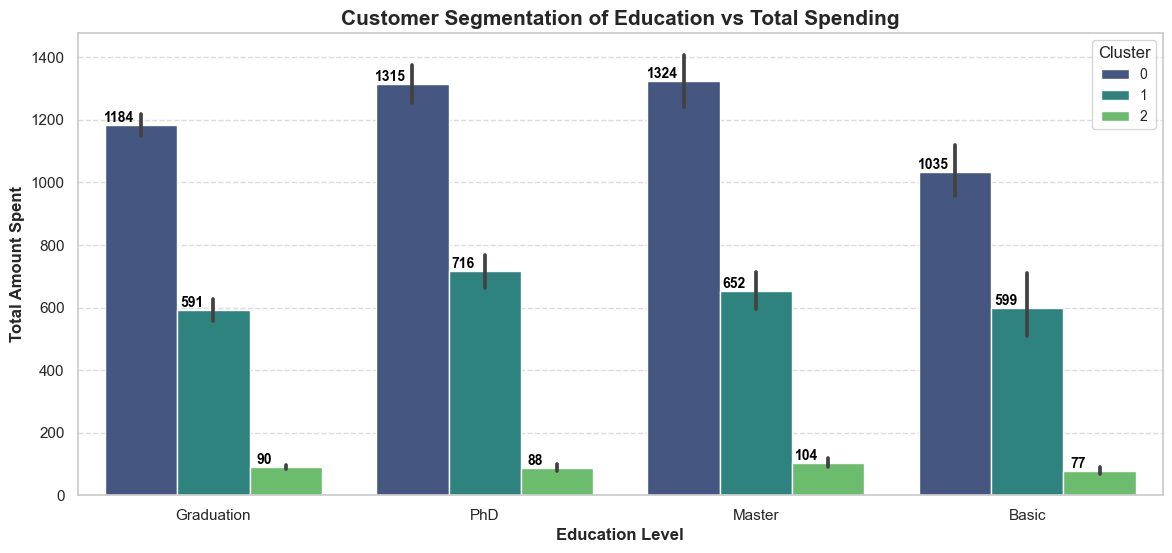

In [262]:
# Visualizing customer segments between Education and Total Spending using Bar Plot:
plt.figure(figsize=(14,6))                                                                         # Adjust the size of plot
ax = sns.barplot(data=df, x='Education', y='Total_Spending', hue='Cluster', palette='viridis')          # Plot the visual
# labels and title formatting
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount Spent', fontsize=12, fontweight='bold')
plt.title('Customer Segmentation of Education vs Total Spending', fontsize=15, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)                                                      # Add grid lines to improve readability

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),                                                     # Format Annotation
                (p.get_x() + p.get_width() / 5., p.get_height()),                                  # Position on top of bars
                ha = 'center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.legend(title='Cluster', title_fontsize=12, fontsize=10)                                        # Legend styling
plt.show()                   

## Key Insights:
  - Higher Education indicates higher spending pattern such as customers with PhD and Masters
  - Cluster 0 seems to be a high spender regardless of the education.

  - Cluster Pattern :
    - Cluster 0 -> Highest Spending Group
    - Cluster 1 -> Moderate Spending Group
    - Cluster 2 -> Lowest Spending Group

  - Higher education does correlate with increase in spending.

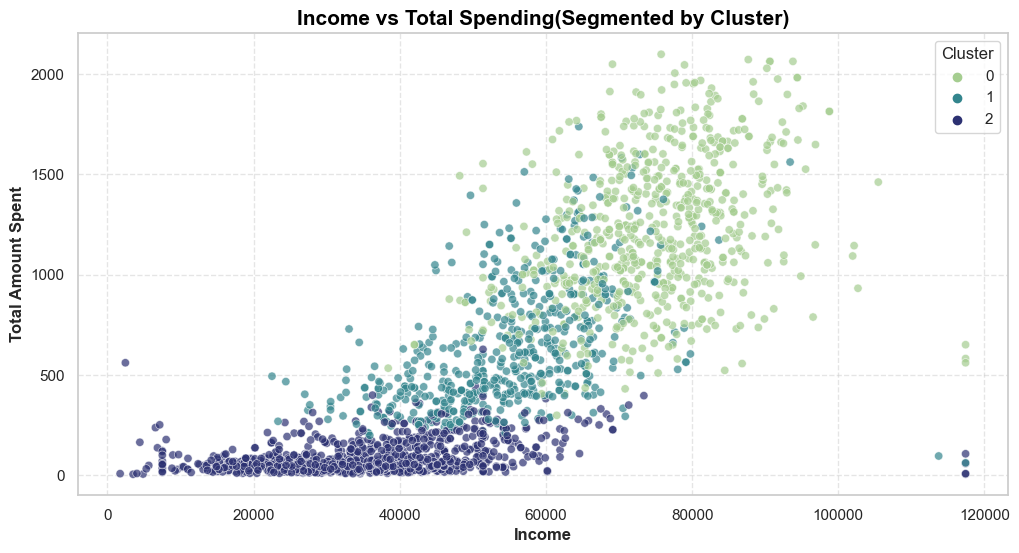

In [263]:
# Visualizing scatterplot : Income vs Total_Spending (Segmented by Cluster)

# Adjust the figure of plot
plt.figure(figsize=(12,6))

# Visualize the scatterplot using seaborn
sns.scatterplot(df, x='Income', y='Total_Spending', hue='Cluster', palette='crest', alpha=0.7)

# Format x and y labels with title
plt.xlabel('Income', fontsize=12, fontweight='bold')
plt.ylabel('Total Amount Spent', fontsize=12, fontweight='bold')
plt.title('Income vs Total Spending(Segmented by Cluster)', fontsize=15, fontweight='bold', color='black')

# Legend
plt.legend(title='Cluster')

# Display the plot with grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Key Insights:
 - There is a positive correlation between income and total spending—as income increases, spending also rises.
 - However, spending behavior varies significantly across different clusters.
 ---

## Identifying Cluster Segments based on campaign responses and purchase frequency:

### Campaign Responses Segment:

In [264]:
# Creating a new feature of Sum of campaigns and calculating average responses on it:
df['Total_campaigns'] = df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=1)

# Using groupby on Total Campaigns to understand customers segment:
df.groupby('Cluster')[['Total_campaigns', 'Response']].mean()

Total_campaigns  Response
Cluster                           
0                   0.61      0.25
1                   0.29      0.15
2                   0.09      0.08

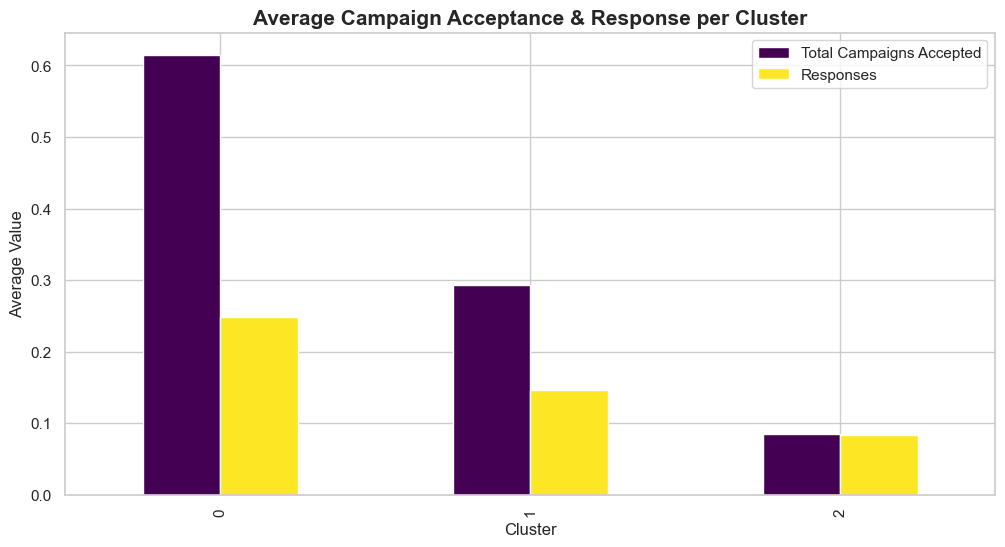

In [265]:
# Visualizing Cluster segments for campaign responses:

cluster_metric = df.groupby('Cluster')[['Total_campaigns', 'Response']].mean()

cluster_metric.plot(kind='bar', figsize=(12,6), colormap='viridis')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.title('Average Campaign Acceptance & Response per Cluster', fontsize=15, fontweight='bold')
plt.legend(['Total Campaigns Accepted', 'Responses'])
plt.show()

## Key Insights: Campaign Response -
 - Cluster 0 -> Highly Engaged Customers:
   - Highest number of acceptance with high responses.
   - Customers in this segment will likely keep responding to marketing campaigns.

 - Cluster 1 -> Moderately Engaged Customers:
   - Response rate is gradually lower than Cluster 0.
   - These customers do show interest in the campaigns, however; fail to show same interest in response.

 - Cluster 2 -> Least Engaged Customers:
   - These customers are less likely to interact with any sort of marketing campaigns.
   - Low acceptance rate with low response rate as well.

### Purchase Frequency based on Clusters:

In [266]:
df.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_Spending Marital_Status   Education  Cluster  Total_campaigns
0 5524.00     1957.00 58138.00     0.00      0.00  2012-09-04    58.00    635.00      81.00           546.00           120.50             81.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      1.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 68.00    4585         1551.50         Single  Graduation        0             0.00
1 2174.00     1954.00 46344.00     1.00      1.00  2014-03-08    38.00     11.00       1.00             6.00             2.00              1.00          6.00               2.00             1.00                 1.00               2.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 71.00    4035           27.00         Single  Graduation        2             0.00
2 4141.00     1965.00 71613.00     0.00      0.00  2013-08-21    26.00    426.00      49.00           127.00           111.00             21.00         42.00               1.00             8.00                 2.00              10.00               4.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 60.00    4234          776.00       Together  Graduation        0             0.00
3 6182.00     1984.00 26646.00     1.00      0.00  2014-02-10    26.00     11.00       4.00            20.00            10.00              3.00          5.00               2.00             2.00                 0.00               4.00               6.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 41.00    4061           53.00       Together  Graduation        2             0.00
4 5324.00     1981.00 58293.00     1.00      0.00  2014-01-19    94.00    173.00      43.00           118.00            46.00             27.00         15.00               5.00             5.00                 3.00               6.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     0                 0              1                     0                        0                       1                      0                        0                  

In [267]:
# We can cluster this pattern same way as Campaign responses:

df['Purchase_frequency'] = df[['NumDealsPurchases', 'NumWebPurchases',
                               'NumCatalogPurchases','NumStorePurchases']].sum(axis=1)                    # Sum up the purchases category

# Groupby Cluster on Purchase frequency:
purchase_freq = df.groupby('Cluster')['Purchase_frequency'].mean()                                        # Calculates frequency

# Display:
print(f"Clustering Segment Pattern for Purchase Frequency:\n\n{purchase_freq}")

Clustering Segment Pattern for Purchase Frequency:

Cluster
0   21.07
1   19.83
2    7.57
Name: Purchase_frequency, dtype: float64


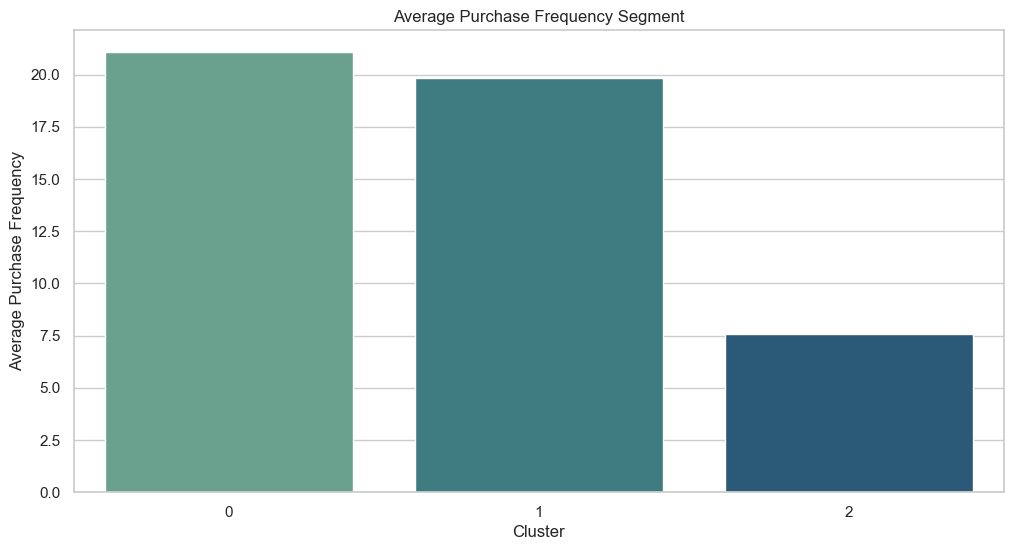

In [268]:
# Visualizing this segment using BarPlot:

plt.figure(figsize=(12,6))                                                             # Adjust the plot size
sns.barplot(df, x=purchase_freq.index, y=purchase_freq.values, palette='crest')        # Visualize the plot
# Labels and titles
plt.xlabel('Cluster')
plt.ylabel('Average Purchase Frequency')
plt.title('Average Purchase Frequency Segment')
plt.show()                                                                             # Display the plot

## Key Insights : Purchase Frequency -
  - Cluster 0 and 1 have high purchase frequency
  - These two clusters represent active shoppers frequently making purhcases through different channels.
  - Cluster 2 on the other hand has the lowest frequency, could mean inactive customers or new customers.
  ---

## 3. Behavioral Analysis :
  - Analyzing purchase behavior across different platforms (web, catalog, store) and checking for patterns in customer behavior, including response rates to campaigns

In [269]:
# Grouping Cluster with different channels to understand purchase behavior:

Purchase_behavior = df.groupby('Cluster')[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Spending','Response']].mean().round(2)

# Print the segment:
print('Purchase Behavior Segmentation:')
display(Purchase_behavior)

Purchase Behavior Segmentation:


NumWebPurchases  NumCatalogPurchases  NumStorePurchases  Total_Spending  Response
Cluster                                                                                   
0                   5.36                 5.71               8.52         1217.20      0.25
1                   6.25                 2.63               7.22          638.77      0.15
2                   1.99                 0.53               3.16           90.03      0.08

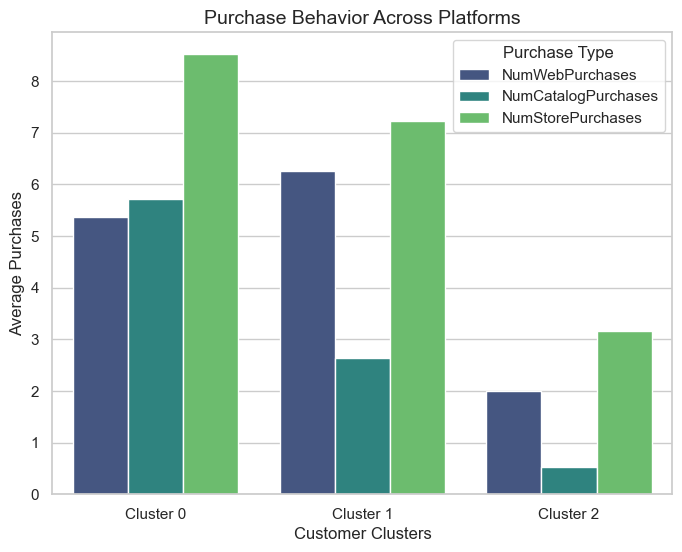

In [270]:
# Visualize this Segment for better understanding:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'Cluster': ['Cluster 0', 'Cluster 1', 'Cluster 2'],
    'NumWebPurchases': [5.36, 6.25, 1.99],
    'NumCatalogPurchases': [5.71, 2.63, 0.53],
    'NumStorePurchases': [8.52, 7.22, 3.16]
}

# Convert to DataFrame
barchart = pd.DataFrame(data)

# Convert to long format for seaborn
barchart_melted = barchart.melt(id_vars='Cluster', var_name='Purchase Type', value_name='Average Purchases')

# Seaborn stacked bar chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

ax = sns.barplot(
    data=barchart_melted, 
    x="Cluster", 
    y="Average Purchases", 
    hue="Purchase Type", 
    palette="viridis"
)

# Labels & Title
plt.title('Purchase Behavior Across Platforms', fontsize=14)
plt.ylabel('Average Purchases')
plt.xlabel('Customer Clusters')

# Show Legend
plt.legend(title='Purchase Type')

# Show Plot
plt.show()

## Key Insights:
  - Cluster 0 -> Customers in this cluster make the highest purchases.
  - Purchases are higher within Store Purchases compared to other channels.

  - Cluster 1 -> Also has a high purchase activity, however; their average purchase rate is below 7.
  - Customer behavior is somewhat similar to cluster 0 by purchasing through Store channel.

  - Cluster 2 -> These customers make significantly lower purchases.
  - Though even their purchases are dominated by store bought, indicating low engagement on web and via catalog.
  --- 

## 4. Dimensionality Reduction (PCA) :
  - Using PCA to identify hidden patterns and reduce the number of features while retaining key information

In [271]:
df_clean = df.copy()

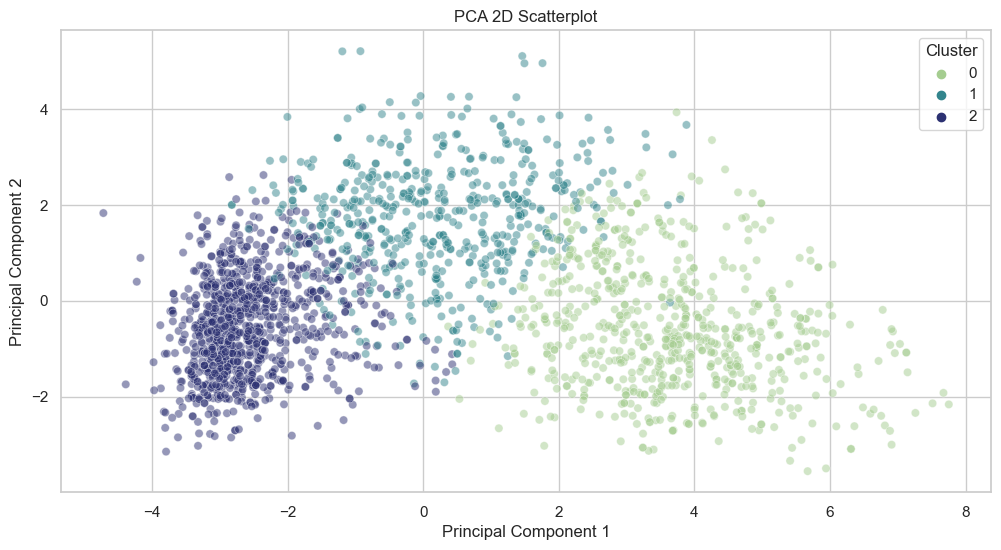

In [272]:
# Import package:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop a few columns that do not contribute to scaling:
df_pca = df_clean.drop(columns=['ID','Year_Birth','Dt_Customer','Marital_Status','Education','Cluster','Total_campaigns','Purchase_frequency'], axis=1)

# Scale the data:
scaler = StandardScaler()             # Initialize the scaler
df_scaled = scaler.fit_transform(df_pca)

# Apply PCA to scaled data:
pca = PCA(n_components=2, random_state=42)    # Using 2 components to visualize the hidden patterns
x_pca = pca.fit_transform(df_scaled)

# Convert PCA into a 2D DataFrame
df_pca_2D = pd.DataFrame(x_pca, columns=['PCA1','PCA2'])

# Add back the Cluster label for segmentation
df_pca_2D['Cluster'] = df_clean['Cluster']

# Plot the 2D visual of PCA results:
plt.figure(figsize=(12,6))
sns.scatterplot(df_pca_2D, x='PCA1', y='PCA2', hue='Cluster', palette='crest', alpha=0.5)
plt.title('PCA 2D Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## PCA Insights:
  - Clusters are fairly well separated.
  - Cluster 2 is packed on left, might indicate low variance.
  - Cluster 1 is more spread out.
  - Cluster 0 is widely dispersed to right, may suggest group varies characteristics.

  - PC1 (Principal Component 1) dominates the separation. It captures the most variance.
  ---

## Generating the final dataset for model building: 
  - Checking multicollineariry.
  - Feature Selection (Only selecting the best features).
  - Converting the dataset into a clean csv file.

In [273]:
# Checking out the DataFrame and what all needs to be dropped, updated, encoded if necessary:
df.head()

ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_Spending Marital_Status   Education  Cluster  Total_campaigns  Purchase_frequency
0 5524.00     1957.00 58138.00     0.00      0.00  2012-09-04    58.00    635.00      81.00           546.00           120.50             81.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      1.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 68.00    4585         1551.50         Single  Graduation        0             0.00               25.00
1 2174.00     1954.00 46344.00     1.00      1.00  2014-03-08    38.00     11.00       1.00             6.00             2.00              1.00          6.00               2.00             1.00                 1.00               2.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 71.00    4035           27.00         Single  Graduation        2             0.00                6.00
2 4141.00     1965.00 71613.00     0.00      0.00  2013-08-21    26.00    426.00      49.00           127.00           111.00             21.00         42.00               1.00             8.00                 2.00              10.00               4.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 60.00    4234          776.00       Together  Graduation        0             0.00               21.00
3 6182.00     1984.00 26646.00     1.00      0.00  2014-02-10    26.00     11.00       4.00            20.00            10.00              3.00          5.00               2.00             2.00                 0.00               4.00               6.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 41.00    4061           53.00       Together  Graduation        2             0.00                8.00
4 5324.00     1981.00 58293.00     1.00      0.00  2014-01-19    94.00    173.00      43.00           118.00            46.00             27.00         15.00               5.00             5.00                 3.00               6.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     0                 0              1                     0               

**Need to drop columns : "ID - Unique Identifier", "Year_Birth - Have an Age column", "Dt_Customer - Not required", "Marital_Status - Encoded Already", "Education - Encoded Already", "Cluster - Were just labels"**

In [274]:
df_final = df.copy()            # Creating the final dataset

df_final.drop(columns = ['ID','Year_Birth','Dt_Customer','Marital_Status','Education','Cluster'], axis=1, inplace=True)    # Dropping the columns

df_final.head()                 # Confirm the changes

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_Spending  Total_campaigns  Purchase_frequency
0 58138.00     0.00      0.00    58.00    635.00      81.00           546.00           120.50             81.00         88.00               3.00             8.00                10.00               4.00               7.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      1.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 68.00    4585         1551.50             0.00               25.00
1 46344.00     1.00      1.00    38.00     11.00       1.00             6.00             2.00              1.00          6.00               2.00             1.00                 1.00               2.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      1                        0                     0                    0 71.00    4035           27.00             0.00                6.00
2 71613.00     0.00      0.00    26.00    426.00      49.00           127.00           111.00             21.00         42.00               1.00             8.00                 2.00              10.00               4.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 60.00    4234          776.00             0.00               21.00
3 26646.00     1.00      0.00    26.00     11.00       4.00            20.00            10.00              3.00          5.00               2.00             2.00                 0.00               4.00               6.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                        0                       0                      0                        1                     0                    0 41.00    4061           53.00             0.00                8.00
4 58293.00     1.00      0.00    94.00    173.00      43.00           118.00            46.00             27.00         15.00               5.00             5.00                 3.00               6.00               5.00          0.00          0.00          0.00          0.00          0.00      0.00           3.00      11.00      0.00                0                     0                 0              1                     0                        0                       1                      0                        0                     0                    0 44.00    4083          422.00             0.00               19.00

In [275]:
# Checking for any multicollinearity using VIF (Variance Inflation Factor):

from statsmodels.stats.outliers_influence import variance_inflation_factor   # Import the package

# Calculate VIF for each feature:
VIF = pd.DataFrame()                                                               # Create a DataFrame VIF
VIF['Features'] = df_final.columns                                                 # Get all features
VIF['vif_scores'] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

# Display the DataFrame:
print(VIF.sort_values(by = 'vif_scores', ascending='False'))

                   Features  vif_scores
22                Z_Revenue        0.00
21            Z_CostContact        0.00
20                 Complain        1.01
3                   Recency        1.07
24          Education_Basic        1.31
35                      Age        1.32
36                   Tenure        1.40
23                 Response        1.53
2                  Teenhome        1.82
1                   Kidhome        1.98
34      Marital_Status_YOLO        2.04
26         Education_Master        2.51
28     Marital_Status_Alone        2.54
27            Education_PhD        3.00
14        NumWebVisitsMonth        3.30
25     Education_Graduation        3.33
0                    Income        4.96
33     Marital_Status_Widow       39.04
29  Marital_Status_Divorced      107.43
31    Marital_Status_Single      193.79
32  Marital_Status_Together      220.81
30   Marital_Status_Married      272.27
37           Total_Spending         inf
19             AcceptedCmp2         inf


In [276]:
# Drop columns having inf values, also keeping few of Marital_Status, products and newly created features based on EDA:
inf_columns = ['Marital_Status_Single','Marital_Status_Together','Marital_Status_Divorced','Total_Spending','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','NumStorePurchases',
               'NumCatalogPurchases','NumWebPurchases','NumDealsPurchases','MntGoldProds','MntSweetProducts','MntFruits']

df_final = df_final.drop(columns = inf_columns, axis=1)

df_final.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntMeatProducts  MntFishProducts  NumWebVisitsMonth  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Married  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_campaigns  Purchase_frequency
0 58138.00     0.00      0.00    58.00    635.00           546.00           120.50               7.00      0.00           3.00      11.00      1.00                0                     1                 0              0                     0                       0                     0                    0 68.00    4585             0.00               25.00
1 46344.00     1.00      1.00    38.00     11.00             6.00             2.00               5.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0 71.00    4035             0.00                6.00
2 71613.00     0.00      0.00    26.00    426.00           127.00           111.00               4.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0 60.00    4234             0.00               21.00
3 26646.00     1.00      0.00    26.00     11.00            20.00            10.00               6.00      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0 41.00    4061             0.00                8.00
4 58293.00     1.00      0.00    94.00    173.00           118.00            46.00               5.00      0.00           3.00      11.00      0.00                0                     0                 0              1                     0                       1                     0                    0 44.00    4083             0.00               19.00

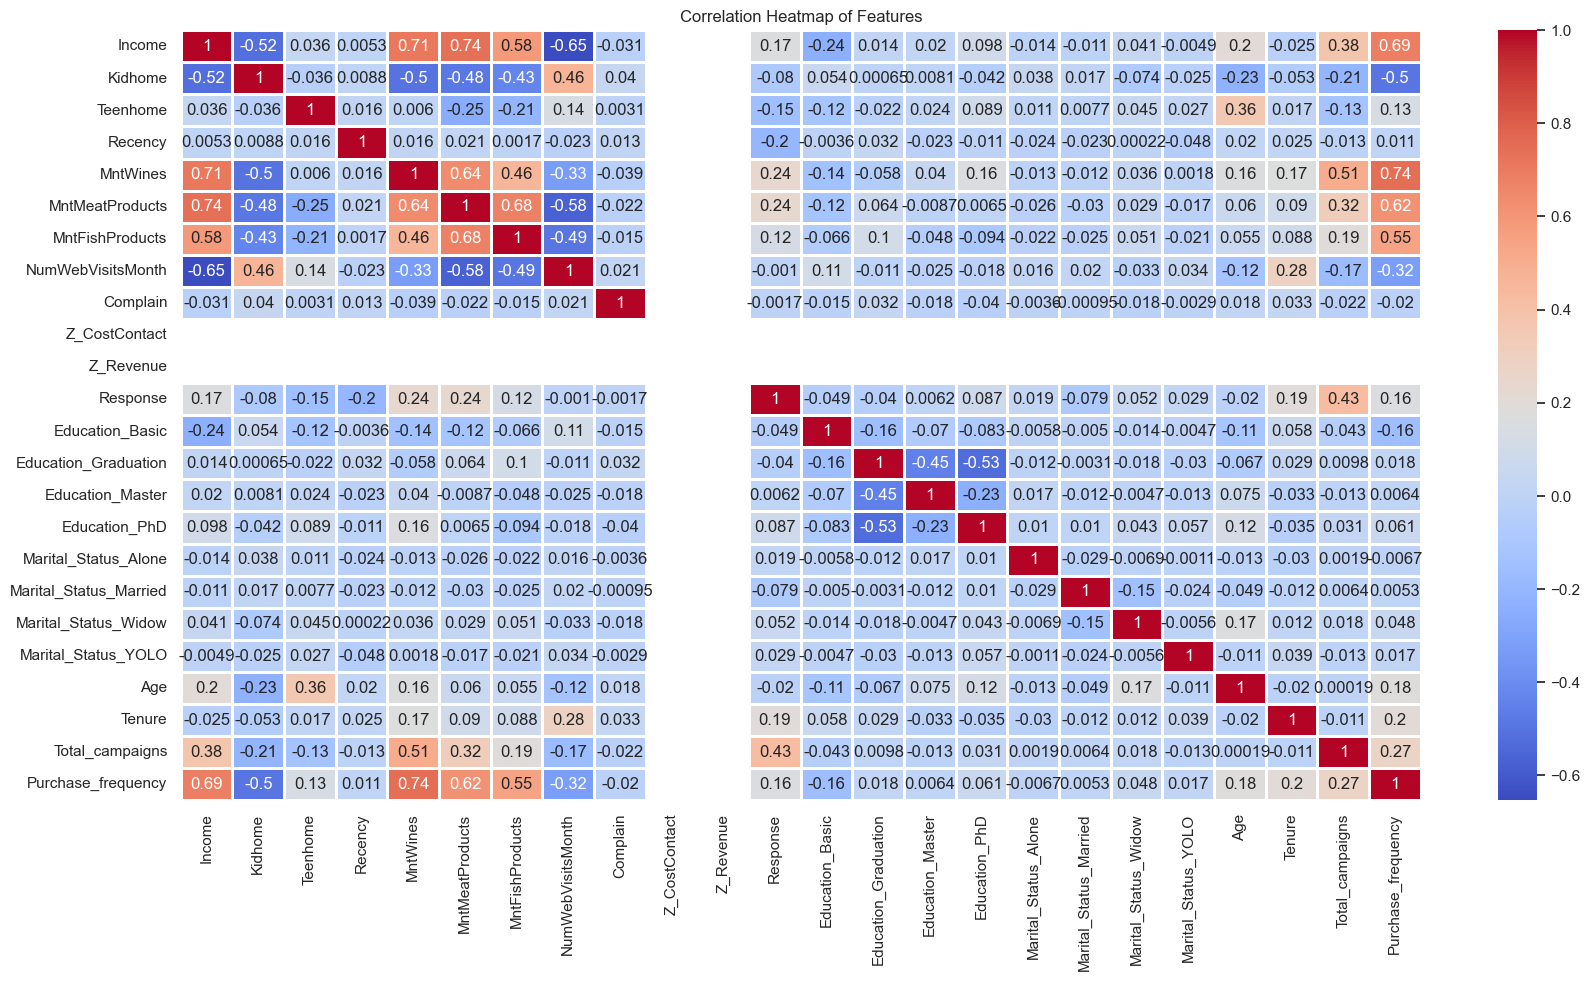

In [277]:
# Check correlation using heatmap:
matrix = df_final.corr()                # Calculates correlation matrix

# Set up the plot
plt.figure(figsize=(20,10))                                                 # Plot size
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=1)              # Set heatmap parameters
plt.title('Correlation Heatmap of Features')                                # Plot title
plt.show()                                                                  # Display the plot

In [278]:
# Re-check the VIF:
# Calculate VIF for each feature:
VIF_1 = pd.DataFrame()                                                               # Create a DataFrame VIF_1
VIF_1['Features'] = df_final.columns                                                 # Get all features
VIF_1['vif_scores'] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

# Display the DataFrame:
print(VIF_1.sort_values(by = 'vif_scores', ascending='False'))

                  Features  vif_scores
9            Z_CostContact        0.00
10               Z_Revenue        0.00
16    Marital_Status_Alone        1.01
8                 Complain        1.01
19     Marital_Status_YOLO        1.01
17  Marital_Status_Married        1.04
18    Marital_Status_Widow        1.06
3                  Recency        1.07
20                     Age        1.29
12         Education_Basic        1.31
21                  Tenure        1.36
11                Response        1.44
2                 Teenhome        1.57
1                  Kidhome        1.69
22         Total_campaigns        1.73
6          MntFishProducts        2.22
14        Education_Master        2.48
7        NumWebVisitsMonth        2.64
15           Education_PhD        2.93
23      Purchase_frequency        3.19
13    Education_Graduation        3.32
5          MntMeatProducts        3.58
4                 MntWines        3.74
0                   Income        4.54


### Changes Confirmation:
  - Successfully removed the highly correlated features, reducing redundancy and kept features those are below 5 VIF Scores.
  - All remaining features contribute independently to the analysis, avoiding any sort of multicollinearity.

### DataFrame : df_final is the updated and final dataset will use for model building stage.

In [279]:
# Scaling the final dataset on only columns having different magnitudes and continuous values using Standard Scaler:

from sklearn.preprocessing import StandardScaler              # import the package
scaler = StandardScaler()                                     # initialize the scaler

# Columns to scale:
cols_to_scale = ["Income", "Recency", "NumWebVisitsMonth", "Age", "Tenure",
                 "Total_campaigns", "MntWines", "MntMeatProducts", "MntFishProducts",
                 "Purchase_frequency"]

# Applying scaler to these columns:
df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

In [281]:
# Saving the final dataset (clean, encoded, scaled) as CSV file:
 
df_final.to_csv("D:/Internship_project_DS/Project-CS/data/marketing_campaign_final.csv", index=False)   # Saved to Data folder itself.

In [284]:
# Upload the final dataset:
df = pd.read_csv('D:\Internship_project_DS\Project-CS\data\marketing_campaign_final.csv')

# Preview the data:
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntMeatProducts  MntFishProducts  NumWebVisitsMonth  Complain  Z_CostContact  Z_Revenue  Response  Education_Basic  Education_Graduation  Education_Master  Education_PhD  Marital_Status_Alone  Marital_Status_Married  Marital_Status_Widow  Marital_Status_YOLO   Age  Tenure  Total_campaigns  Purchase_frequency
0    0.30     0.00      0.00     0.31      1.01             2.21             2.19               0.72      0.00           3.00      11.00      1.00                0                     1                 0              0                     0                       0                     0                    0  1.01    1.53            -0.44                1.38
1   -0.26     1.00      1.00    -0.38     -0.88            -0.81            -0.75              -0.13      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0  1.26   -1.19            -0.44               -1.16
2    0.94     0.00      0.00    -0.80      0.37            -0.13             1.95              -0.55      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0  0.33   -0.21            -0.44                0.84
3   -1.20     1.00      0.00    -0.80     -0.88            -0.73            -0.55               0.30      0.00           3.00      11.00      0.00                0                     1                 0              0                     0                       0                     0                    0 -1.29   -1.06            -0.44               -0.90
4    0.31     1.00      0.00     1.55     -0.39            -0.18             0.34              -0.13      0.00           3.00      11.00      0.00                0                     0                 0              1                     0                       1                     0                    0 -1.03   -0.95            -0.44                0.58